In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from IPython.display import Image

In [34]:
df = pd.read_csv(r'C:\Users\hp\Desktop\ML_Project\Gold Prices Prediction\Gold  Prices.csv', parse_dates=['Date'], index_col='Date')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2019-11-11 00:00:00-05:00,137.610001,137.789993,136.440002,137.059998,7037300,0.0,0.0,0.0
2019-11-12 00:00:00-05:00,137.029999,137.589996,136.190002,137.429993,6448600,0.0,0.0,0.0
2019-11-13 00:00:00-05:00,137.800003,138.220001,137.639999,137.979996,8776000,0.0,0.0,0.0
2019-11-14 00:00:00-05:00,138.389999,138.940002,137.869995,138.559998,5220500,0.0,0.0,0.0
2019-11-15 00:00:00-05:00,138.029999,138.419998,137.970001,138.210007,10106700,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2024-11-04 00:00:00-05:00,253.320007,253.580002,252.270004,252.830002,4581400,0.0,0.0,0.0
2024-11-05 00:00:00-05:00,253.779999,253.990005,252.410004,253.399994,6029900,0.0,0.0,0.0
2024-11-06 00:00:00-05:00,245.639999,247.350006,244.949997,245.699997,14600200,0.0,0.0,0.0


In [35]:
# Main Observations:
# 1.Price Volatility Comparison: You can compare the relative changes of these four indicators over time, particularly the relationship between the close price and the open, high, and low prices. This helps identify intra-day price fluctuations, trends, and potential market sentiment.
# 2. Market Trends: if there is a significant difference between the open and close prices, it might indicate that there was considerable volatility or a reversal in the market on that day. If the range between the high and low prices is large, it could indicate market uncertainty or strong fluctuations.
# This chart format helps to observe how these indicators evolve over time and provides intuitive visual support for further analysis, such as technical analysis or trend identification.

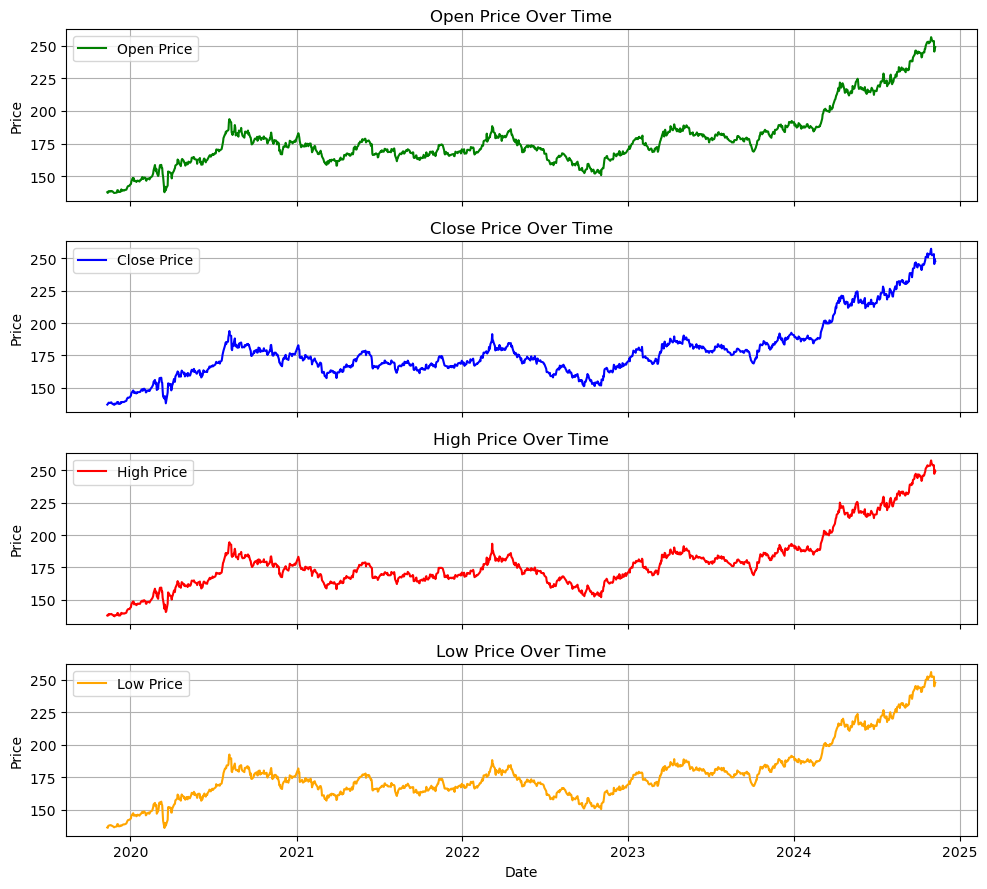

In [36]:
fig, axes = plt.subplots(4, 1, figsize=(10, 9), sharex=True)

# Plot Open Price in the first subplot
axes[0].plot(df.index, df['Open'], label='Open Price', color='green')  
axes[0].set_title('Open Price Over Time') 
axes[0].set_ylabel('Price') 
axes[0].grid(True) 
axes[0].legend()  

# Plot Close Price in the second subplot
axes[1].plot(df.index, df['Close'], label='Close Price', color='blue')  
axes[1].set_title('Close Price Over Time')  
axes[1].set_ylabel('Price')  
axes[1].grid(True)  
axes[1].legend()  #

# Plot High Price in the third subplot
axes[2].plot(df.index, df['High'], label='High Price', color='red')  
axes[2].set_title('High Price Over Time') 
axes[2].set_ylabel('Price')  
axes[2].grid(True)  
axes[2].legend() 

# Plot Low Price in the fourth subplot
axes[3].plot(df.index, df['Low'], label='Low Price', color='orange')  
axes[3].set_title('Low Price Over Time')  
axes[3].set_xlabel('Date')  
axes[3].set_ylabel('Price')  
axes[3].grid(True)  
axes[3].legend() 

# Adjust spacing between subplots
plt.tight_layout() 
plt.show()  

Currently, it is difficult to discern a clear pattern in the gold prices. However, it appears that there is no significant difference between the open and close prices.

In [37]:
# Observe the changes in gold price trading volume over time, and clearly see the fluctuations in trading volume on specific dates through the bar chart.

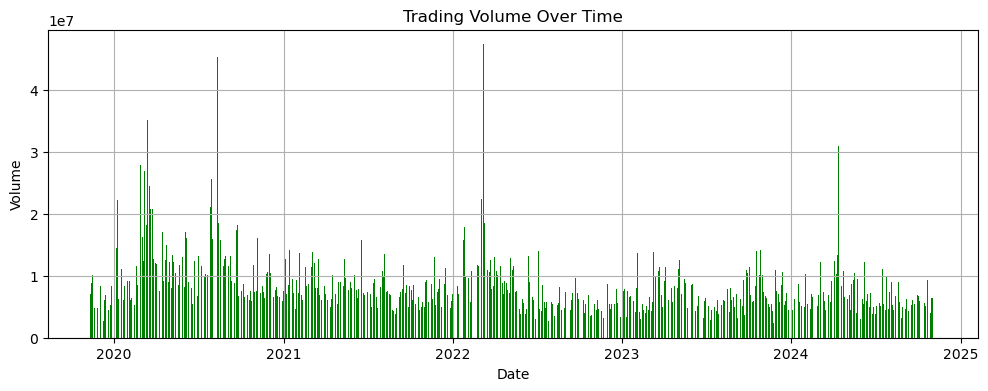

In [38]:
# Create a figure and axis for the bar chart
plt.figure(figsize=(12, 4))

# Plot the trading volume as bars
plt.bar(df.index, df['Volume'], color='green')  

# Add title and labels
plt.title('Trading Volume Over Time')  
plt.xlabel('Date')  
plt.ylabel('Volume')  

# Display grid for better readability
plt.grid(True)

# Show the chart
plt.show()

Using a combination chart allows for simultaneous observation of the closing price and trading volume over time, with each dataset having its own scale, enhancing readability.

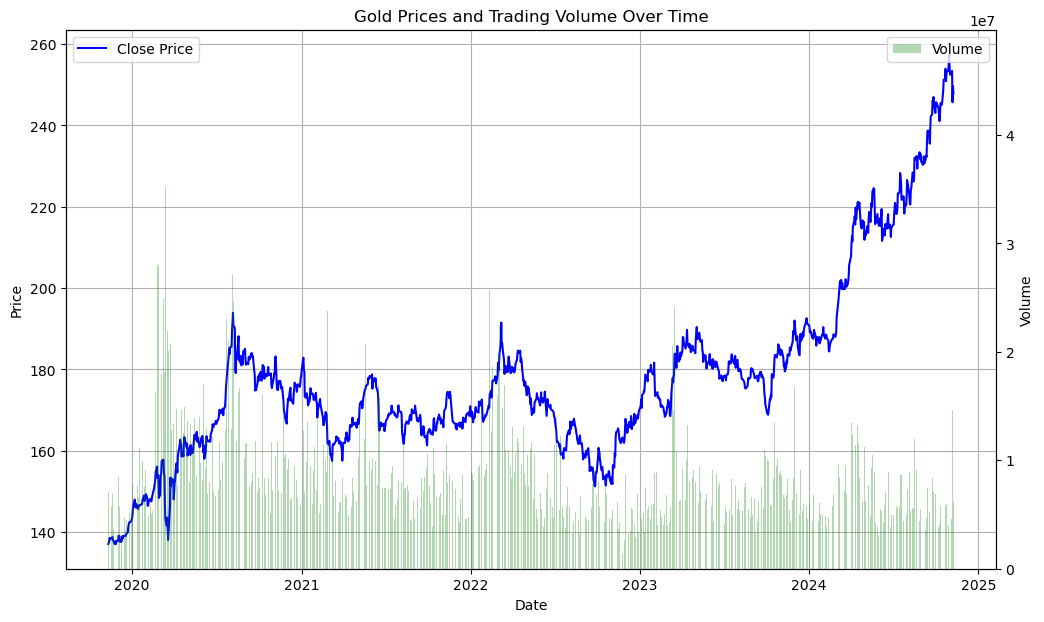

In [39]:
# Create a figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot the closing price on the first y-axis
ax1.plot(df.index, df['Close'], label='Close Price', color='blue')  
ax1.set_xlabel('Date')  
ax1.set_ylabel('Price')  
ax1.set_title('Gold Prices and Trading Volume Over Time')  
ax1.legend(loc='upper left')  
ax1.grid(True)  

# Create a second y-axis for trading volume
ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='green', alpha=0.3, label='Volume')  
ax2.set_ylabel('Volume') 
ax2.legend(loc='upper right') 

# Display the plot
plt.show()

This chart helps analyze the trend of gold prices and observe how moving averages of different time periods interact with the actual prices, thereby identifying potential price reversals or trend changes.

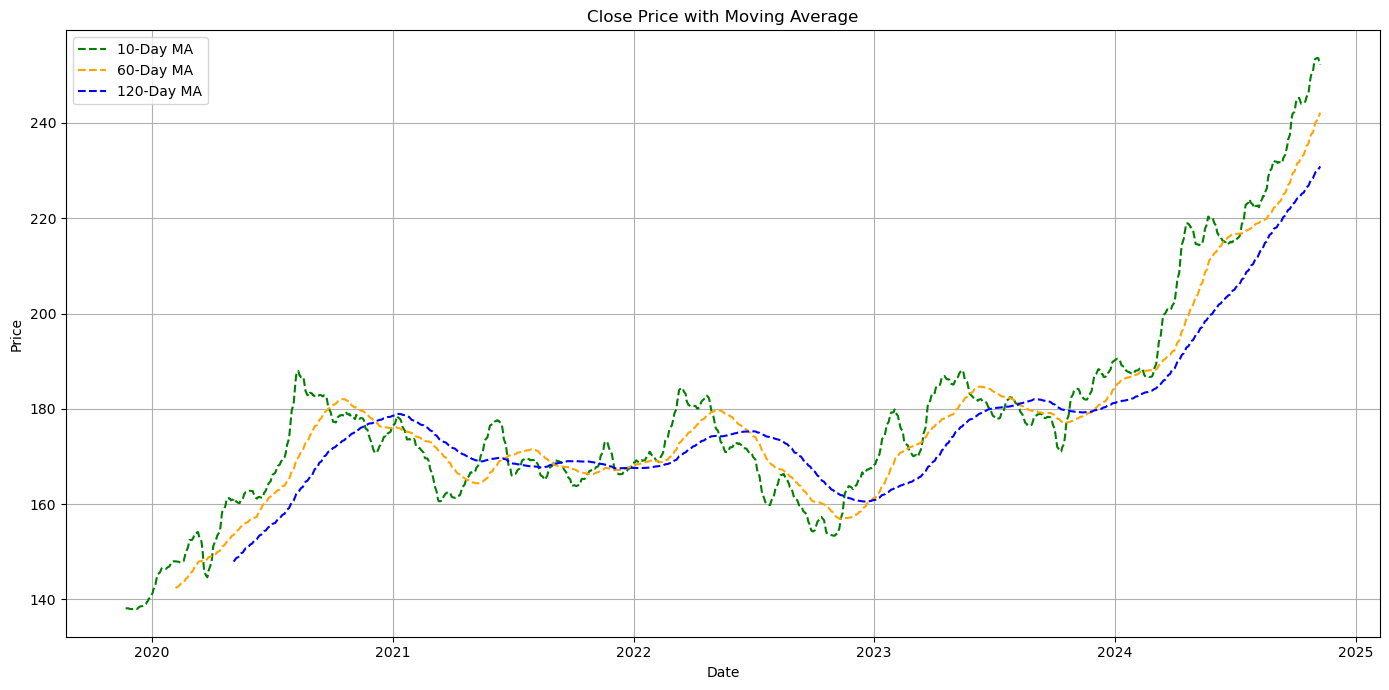

In [40]:
# Calculate the moving averages
df['MA10'] = df['Close'].rolling(window=10).mean() #10 days moving avg
df['MA60'] = df['Close'].rolling(window=60).mean() #60 days moving avg
df['MA120'] = df['Close'].rolling(window=120).mean() #120 days moving avg

# MA10 → Captures short-term trends (quick price movements).
# MA60 → Captures medium-term trends (more stable patterns).
# MA120 → Captures long-term trends (slow, stable patterns).

#Create the plot
plt.figure(figsize=(14, 7))

#Plot the closing price and moving averages
plt.plot(df.index, df['MA10'], label='10-Day MA', color='green', linestyle='--')
plt.plot(df.index, df['MA60'], label='60-Day MA', color='orange', linestyle='--')
plt.plot(df.index, df['MA120'], label='120-Day MA', color='blue', linestyle='--')

#Add title and labels
plt.title('Close Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

#Display grid for better readability
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Display Death Cross

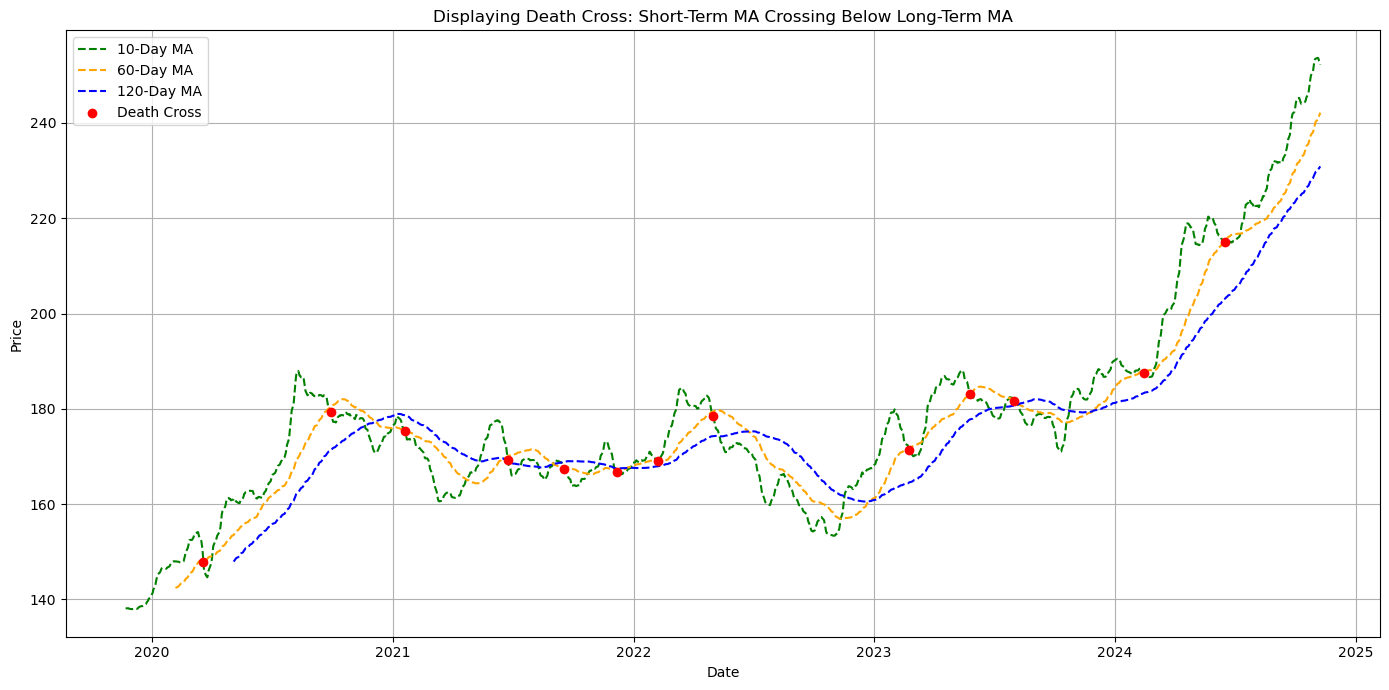

In [41]:
# Calculate the Death Cross points
death_cross_10_60 = (df['MA10'] <df['MA60']) & (df['MA10'].shift(1) > df['MA60'].shift(1))
# df['MA10'].shift(1) > df['MA60'].shift(1) checks if yesterday was above.
# df['MA10'] < df['MA60'] checks if today is below.

# Create the plot
plt.figure(figsize=(14, 7))

# Plot the closing price and moving averages
plt.plot(df.index, df['MA10'], label='10-Day MA', color='green', linestyle='--')
plt.plot(df.index, df['MA60'], label='60-Day MA', color='orange', linestyle='--')
plt.plot(df.index, df['MA120'], label='120-Day MA', color='blue', linestyle='--')

# Mark the Death Cross points on the chart
plt.scatter(df.index[death_cross_10_60], df['MA10'][death_cross_10_60], color='red', label='Death Cross', zorder=5)

# Add title and labels
plt.title('Displaying Death Cross: Short-Term MA Crossing Below Long-Term MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Display drid
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Display Golden Cross

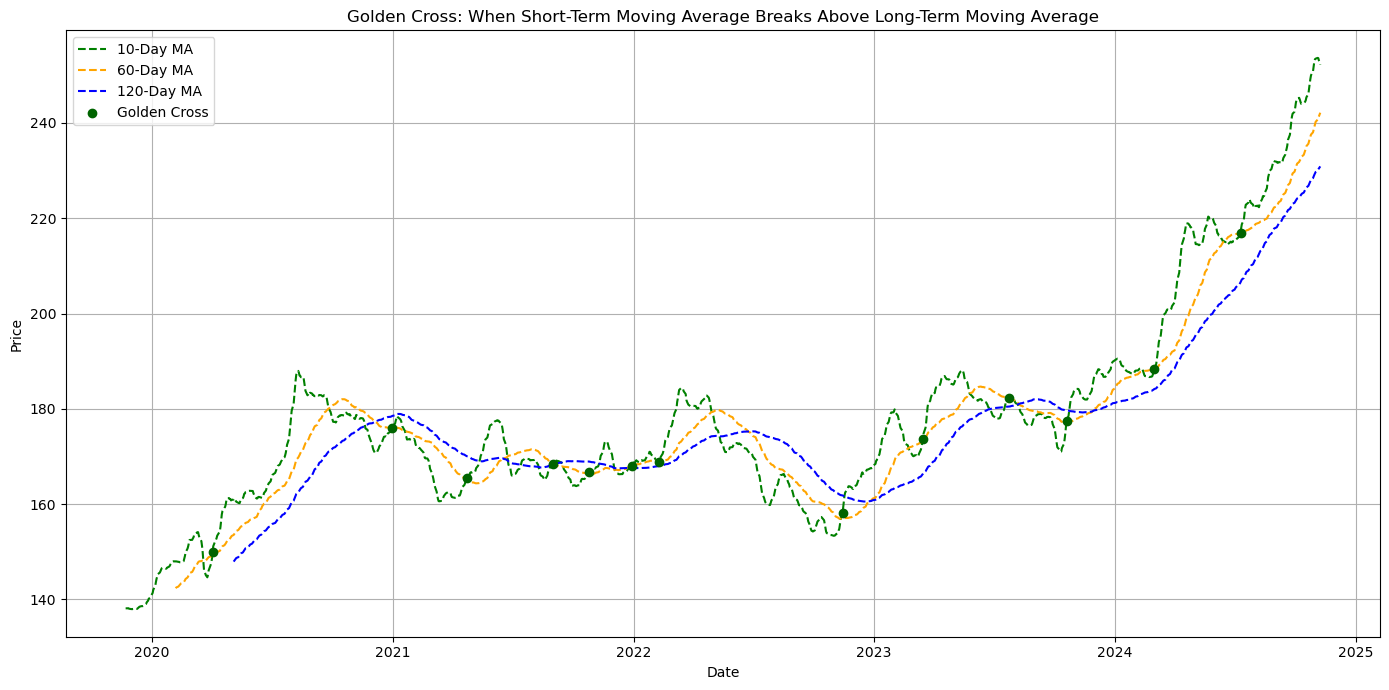

In [42]:
# Calculate the Golden Cross Points
golden_cross_10_60 = (df['MA10'] > df['MA60']) & (df['MA10'].shift(1) < df['MA60'].shift(1))

#Create the plot
plt.figure(figsize=(14, 7))

# Plot the closing price and moving averages
plt.plot(df.index, df['MA10'], label='10-Day MA', color='green', linestyle='--')
plt.plot(df.index, df['MA60'], label='60-Day MA', color='orange', linestyle='--')
plt.plot(df.index, df['MA120'], label='120-Day MA', color='blue', linestyle='--')

# Mark the Golden Cross points on the chart
plt.scatter(df.index[golden_cross_10_60], df['MA10'][golden_cross_10_60], color='darkgreen', label='Golden Cross', zorder=5)

#Add title and labels
plt.title('Golden Cross: When Short-Term Moving Average Breaks Above Long-Term Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Display grid
plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

### Data Preprocessing
refers to the steps taken to prepare raw data for machine learning or modelling. These steps are essential to ensure that the model can effectively learn from the data.In your case, the steps include:

1. ##### Feature Selection:
   Choosing the relevant data(eg: 'Close'price).
   
3. ##### Scaling/Normalization:   
Adjusting the data range to make it easier for the model to process and learn.4 #####
3. Sequence Creat:i   on
Splitting the data into sequences that can be used to predict future values      (a crucial step for time-series predicti


   n5. #####

4. Conversion to :Arrays
Transforming the data into a format (e.g., numpy arrays) suitable for input into machine learning models.

In [43]:
# Choosing the feature you want to predict (eg: 'Close' price)
data = df['Close'].values.reshape(-1, 1)

#Scale the data to the range [0, 1]
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data)

# Create input sequence and labels
sequence_length = 30
X, y = [], []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

#Conversion to Arrays
X, y = np.array(X), np.array(y)

1. Training Set (80%):
This will be used to train the model.

2. Testing Set (20%):
This will be used to evaluate the model's performance after it has been trained.

In [44]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)  
X_train, X_test = X[:train_size], X[train_size:]  
y_train, y_test = y[:train_size], y[train_size:] 

Training data period: 2019-12-24 00:00:00-05:00 to 2023-11-16 00:00:00-05:00
Testing data period: 2023-11-17 00:00:00-05:00 to 2024-11-08 00:00:00-05:00


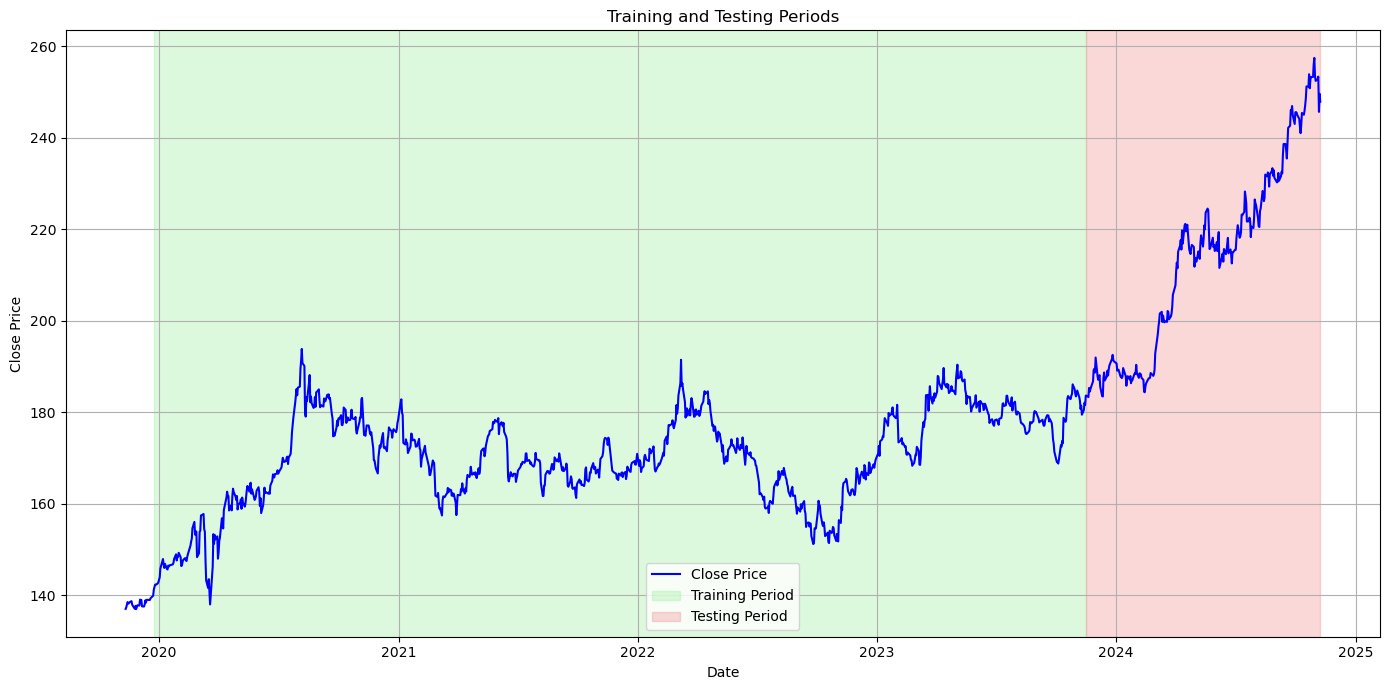

In [45]:
# Extract corresponding date index from the original data
dates = df.index[sequence_length:]  # Because the first 'sequence_length' data points are removed

# Get the corresponding date range based on the split between training and testing
train_dates = dates[:train_size]
test_dates = dates[train_size:]

# Print the start and end dates for the training and testing sets
print("Training data period: {} to {}".format(train_dates[0], train_dates[-1]))
print("Testing data period: {} to {}".format(test_dates[0], test_dates[-1]))

# Plot the entire dataset
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')

# Highlight the training and testing periods
plt.axvspan(train_dates[0], train_dates[-1], color='lightgreen', alpha=0.3, label='Training Period')
plt.axvspan(test_dates[0], test_dates[-1], color='lightcoral', alpha=0.3, label='Testing Period')

# Add title and labels
plt.title('Training and Testing Periods')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Add a legend
plt.legend()

# Display grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## LSTM Model Overview

In [46]:
# Build a  LSTM model
model = Sequential()

# First Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True, 
                              kernel_regularizer=l2(0.001), 
                              input_shape=(X.shape[1], 1))))
model.add(Dropout(0.5)) 

# Second Bidirectional LSTM layer
model.add(Bidirectional(LSTM(units=100, return_sequences=True, 
                              kernel_regularizer=l2(0.001))))
model.add(Dropout(0.5))  

# Third LSTM layer
model.add(LSTM(units=100, return_sequences=True, 
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  

# Fourth LSTM layer
model.add(LSTM(units=50, return_sequences=False, 
               kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  

# Fully connected layer
model.add(Dense(units=50, activation='relu'))  
model.add(Dropout(0.5)) 

# Output layer
model.add(Dense(units=1))  

# Adjust Adam optimizer parameters
adam_optimizer = Adam(learning_rate=0.00001,  
                      beta_1=0.9,          
                      beta_2=0.999,       
                      epsilon=1e-07)       

# Compile the model using the custom Adam optimizer
model.compile(optimizer=adam_optimizer, loss='mean_squared_error')


# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True) 

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
!conda install graphviz -y


Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



In [50]:
# # Manually build the model
# model.build(input_shape=(None, X.shape[1], 1))  

# # Save the model architecture to a file
# plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True, dpi=60)

# # Display the model architecture image
# Image('model_structure.png')

# Training

In [51]:
# Train the model with specified parameters, including early stopping
history = model.fit(X, y, epochs=100, batch_size=4, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 24s 46ms/step - loss: 1.0071 - val_loss: 1.0716
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.8986 - val_loss: 0.8959
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 16s 58ms/step - loss: 0.8367 - val_loss: 0.8424
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 22s 81ms/step - loss: 0.7842 - val_loss: 0.7874
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - loss: 0.7361 - val_loss: 0.7402
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.6873 - val_loss: 0.6768
Epoch 7/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.6487 - val_loss: 0.6374
Epoch 8/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - loss: 0.6082 - val_loss: 0.5958
Epoch 9/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 0.5706 - val_loss: 0.5604
Epoch 10/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 13s 45ms/step - loss: 0.5320 - val_loss: 0.5238
Epoch 11/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - loss: 0.4996 - val_loss: 0.4813
Epoch 12/100
277/27

# Evaluation And Performance

### Training Vs. Validation Loss

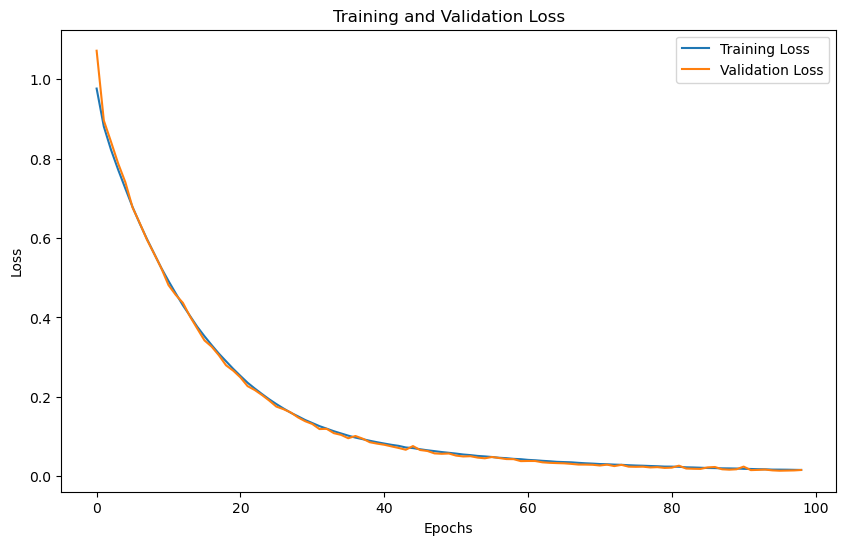

In [52]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')

# Plot validation loss
plt.plot(history.history['val_loss'], label='Validation Loss')

# Add legend
plt.legend()

# Add title and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Show the plot
plt.show()

### Loss Trends Over Epochs: Training vs. Validation

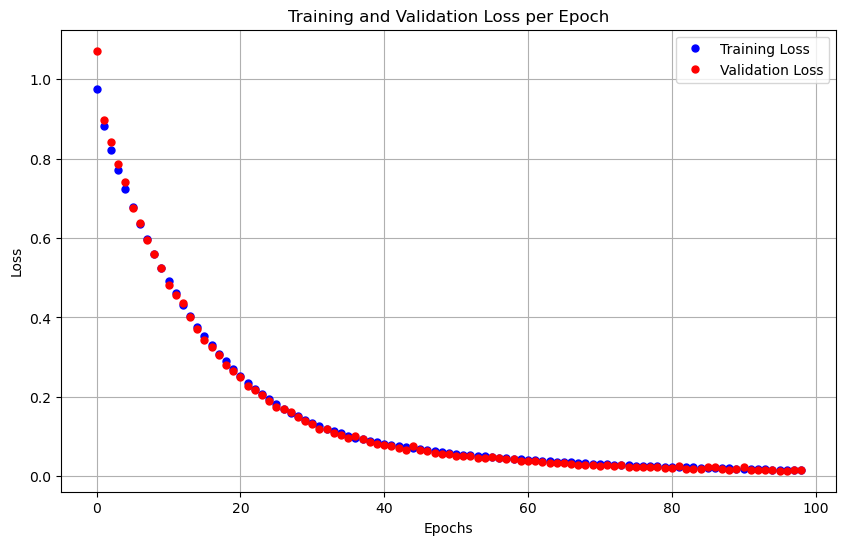

In [53]:
# Create a plot with a specific figure size
plt.figure(figsize=(10, 6))

# Plot training loss with blue dots
plt.plot(history.history['loss'], label='Training Loss', color='blue', marker='o', markersize=5, linestyle='None')

# Plot validation loss with red dots
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', marker='o', markersize=5, linestyle='None')

# Add title, labels, and legend
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display grid for better visibility
plt.grid(True)

# Show the plot
plt.show()

### Comparison of Predicted vs Actual Values

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step


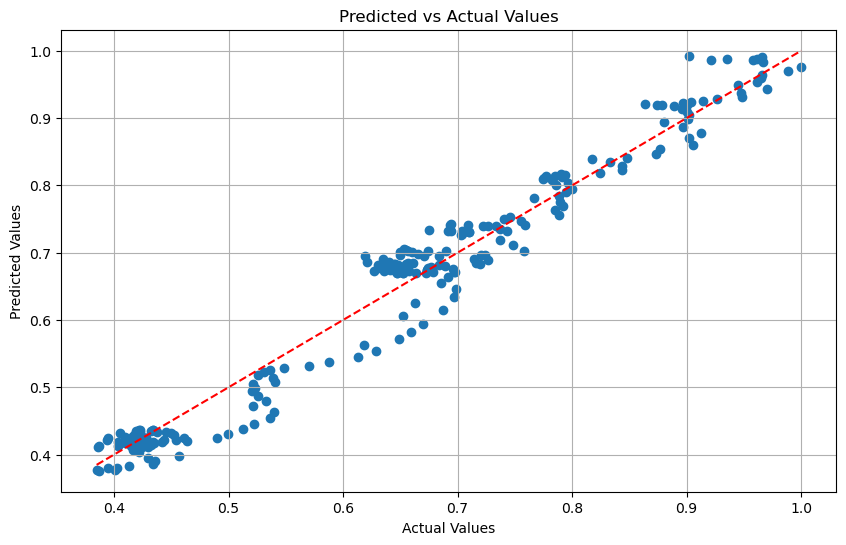

In [54]:
y_pred = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

### Actual vs Predicted Gold Prices

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


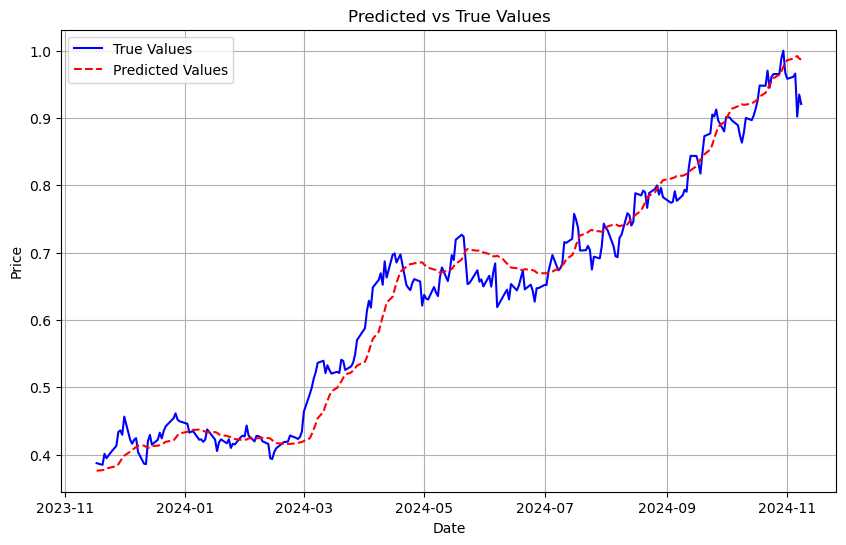

In [55]:
# Get predictions on the test data
predictions = model.predict(X_test)

# Denormalize the predictions and actual values to original scale
y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y_test)  

# Plot predicted vs true values
plt.figure(figsize=(10, 6))
plt.plot(test_dates, y_test, label='True Values', color='blue')
plt.plot(test_dates, predictions, label='Predicted Values', color='red', linestyle='--')
plt.legend()
plt.title('Predicted vs True Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Actual vs Future Predicted Gold Prices(Long-term prediction)

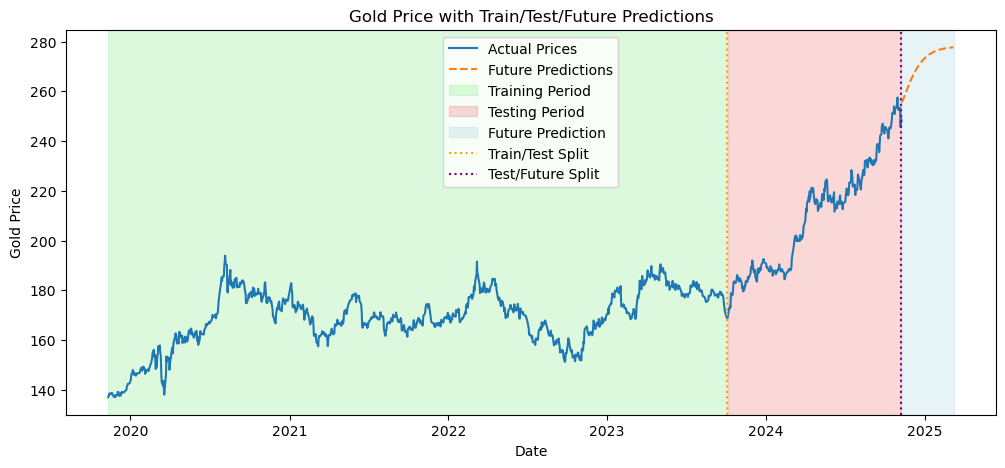

In [56]:
# Create a new input sequence to predict future prices
future_predictions = []
last_sequence = scaled_data[-sequence_length:]  

for _ in range(120):  
    # Reshape input to (1, sequence_length, 1)
    input_data = last_sequence.reshape(1, sequence_length, 1)
    # Perform single-step prediction
    predicted_price = model.predict(input_data, verbose=0)
    
    # Store the predicted price
    future_predictions.append(predicted_price[0, 0])
    
    # Update the input sequence
    last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

# Inverse scale the predicted values to the original price range
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Display the results
plt.figure(figsize=(12, 5))

# Plot actual data (train + test)
plt.plot(df.index, data, label='Actual Prices')  

# Plot future predictions
future_dates = pd.date_range(df.index[-1], periods=121, freq='D')[1:]
plt.plot(future_dates, future_predictions, label='Future Predictions', linestyle='--')

# Label train, test, and future periods
train_end_date = df.index[train_size-1]  
test_start_date = df.index[train_size]   
test_end_date = df.index[-1]           

# Add shaded areas (background color) for train, test, and future periods
plt.axvspan(df.index[0], train_end_date, color='lightgreen', alpha=0.3, label='Training Period')
plt.axvspan(test_start_date, test_end_date, color='lightcoral', alpha=0.3, label='Testing Period')
plt.axvspan(test_end_date, future_dates[-1], color='lightblue', alpha=0.3, label='Future Prediction')

# Add vertical lines to separate the periods
plt.axvline(x=train_end_date, color='orange', linestyle=':', label='Train/Test Split')
plt.axvline(x=test_end_date, color='purple', linestyle=':', label='Test/Future Split')

# Add titles and labels
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.title('Gold Price with Train/Test/Future Predictions')

# Show the plot
plt.show()

### Actual vs Future Predicted Gold Prices (Short-term, Mid-term, and Long-term)

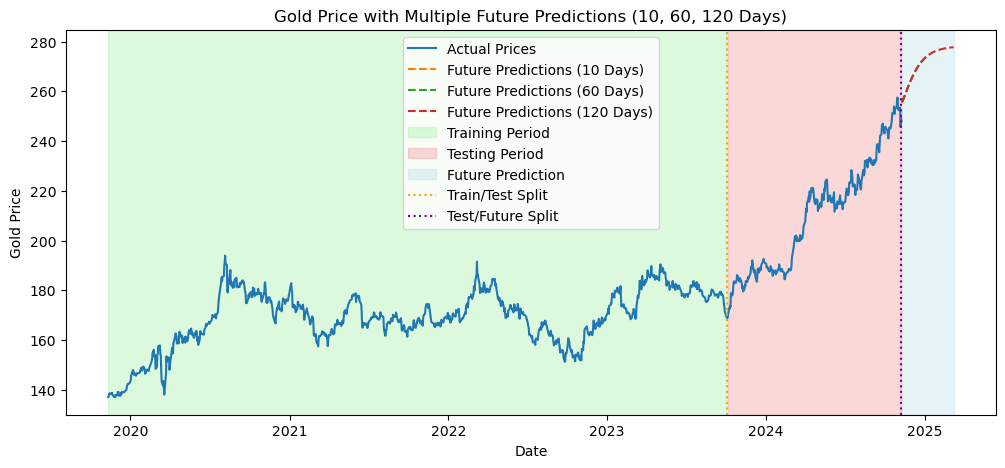

In [57]:
# Create new input sequence to predict future prices for different ranges
future_predictions_10 = []
future_predictions_60 = []
future_predictions_120 = []

# Initialize the last sequence from the scaled data
last_sequence = scaled_data[-sequence_length:]

# Predict for 10 days
for _ in range(10):  
    input_data = last_sequence.reshape(1, sequence_length, 1)
    predicted_price = model.predict(input_data, verbose=0)
    future_predictions_10.append(predicted_price[0, 0])
    last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

# Predict for 60 days
last_sequence = scaled_data[-sequence_length:]  # Reset last_sequence
for _ in range(60):  
    input_data = last_sequence.reshape(1, sequence_length, 1)
    predicted_price = model.predict(input_data, verbose=0)
    future_predictions_60.append(predicted_price[0, 0])
    last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

# Predict for 120 days
last_sequence = scaled_data[-sequence_length:]  # Reset last_sequence
for _ in range(120):  
    input_data = last_sequence.reshape(1, sequence_length, 1)
    predicted_price = model.predict(input_data, verbose=0)
    future_predictions_120.append(predicted_price[0, 0])
    last_sequence = np.append(last_sequence[1:], predicted_price, axis=0)

# Inverse scale the predicted values to the original price range
future_predictions_10 = scaler.inverse_transform(np.array(future_predictions_10).reshape(-1, 1))
future_predictions_60 = scaler.inverse_transform(np.array(future_predictions_60).reshape(-1, 1))
future_predictions_120 = scaler.inverse_transform(np.array(future_predictions_120).reshape(-1, 1))

# Display the results
plt.figure(figsize=(12, 5))

# Plot actual data (train + test)
plt.plot(df.index, data, label='Actual Prices')  

# Create future dates for plotting
future_dates_10 = pd.date_range(df.index[-1], periods=11, freq='D')[1:]
future_dates_60 = pd.date_range(df.index[-1], periods=61, freq='D')[1:]
future_dates_120 = pd.date_range(df.index[-1], periods=121, freq='D')[1:]

# Plot future predictions for different periods
plt.plot(future_dates_10, future_predictions_10, label='Future Predictions (10 Days)', linestyle='--')
plt.plot(future_dates_60, future_predictions_60, label='Future Predictions (60 Days)', linestyle='--')
plt.plot(future_dates_120, future_predictions_120, label='Future Predictions (120 Days)', linestyle='--')

# Label train, test, and future periods
train_end_date = df.index[train_size-1]  
test_start_date = df.index[train_size]   
test_end_date = df.index[-1]           

# Add shaded areas (background color) for train, test, and future periods
plt.axvspan(df.index[0], train_end_date, color='lightgreen', alpha=0.3, label='Training Period')
plt.axvspan(test_start_date, test_end_date, color='lightcoral', alpha=0.3, label='Testing Period')
plt.axvspan(test_end_date, future_dates_120[-1], color='lightblue', alpha=0.3, label='Future Prediction')

# Add vertical lines to separate the periods
plt.axvline(x=train_end_date, color='orange', linestyle=':', label='Train/Test Split')
plt.axvline(x=test_end_date, color='purple', linestyle=':', label='Test/Future Split')

# Add titles and labels
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.title('Gold Price with Multiple Future Predictions (10, 60, 120 Days)')

# Show the plot
plt.show()